# Visualizing Samples

This tutorial shows how to visualize and save the extent of your samples before and during training. In this particular example, we compare a vanilla RandomGeoSampler with one bounded by multiple ROI's and show how easy it is to gain insight on the distribution of your samples.

In [1]:
import os
import tempfile

import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from torchgeo.datasets import NAIP, stack_samples
from torchgeo.datasets.utils import download_url
from torchgeo.samplers import RandomGeoSampler


def run_epochs(dataset, sampler):
    dataloader = DataLoader(
        dataset, sampler=sampler, batch_size=1, collate_fn=stack_samples, num_workers=0
    )
    fig, ax = plt.subplots()
    num_epochs = 5
    for epoch in range(num_epochs):
        color = plt.cm.viridis(epoch / num_epochs)
        # sampler.chips.to_file(f'naip_chips_epoch_{epoch}') # Optional: save chips to file for display in GIS software
        ax = sampler.chips.plot(ax=ax, color=color)
        for sample in dataloader:
            pass
    plt.show()

Generate dataset

In [2]:
naip_root = os.path.join(tempfile.gettempdir(), 'naip')
naip_url = (
    'https://naipeuwest.blob.core.windows.net/naip/v002/de/2018/de_060cm_2018/38075/'
)
tiles = ['m_3807511_ne_18_060_20181104.tif', 'm_3807512_sw_18_060_20180815.tif']
for tile in tiles:
    download_url(naip_url + tile, naip_root)

naip = NAIP(naip_root)

Using downloaded and verified file: C:\Users\SIEGER~1.FAL\AppData\Local\Temp\naip\m_3807511_ne_18_060_20181104.tif
Using downloaded and verified file: C:\Users\SIEGER~1.FAL\AppData\Local\Temp\naip\m_3807512_sw_18_060_20180815.tif


First we create the default sampler for our dataset (3 samples) and run it for 5 epochs and plot its results. Each color displays a different epoch, so we can see how the RandomGeoSampler has distributed it's samples for every epoch.

In [3]:
sampler = RandomGeoSampler(naip, size=1000, length=3)

generating samples... 


100%|██████████| 3/3 [00:00<00:00, 998.72it/s]


generating samples... 


100%|██████████| 3/3 [00:00<?, ?it/s]


generating samples... 


100%|██████████| 3/3 [00:00<?, ?it/s]


generating samples... 


100%|██████████| 3/3 [00:00<?, ?it/s]


generating samples... 


100%|██████████| 3/3 [00:00<?, ?it/s]


generating samples... 


100%|██████████| 3/3 [00:00<?, ?it/s]


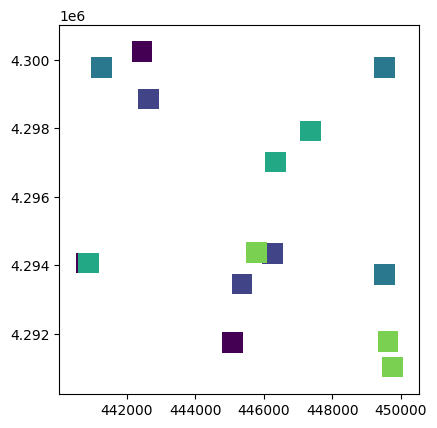

In [4]:
run_epochs(naip, sampler)

Now we split our dataset by two bounding boxes and re-inspect the samples.

In [5]:
import numpy as np

from torchgeo.datasets import roi_split
from torchgeo.datasets.utils import BoundingBox

rois = [
    BoundingBox(440854, 442938, 4299766, 4301731, 0, np.inf),
    BoundingBox(449070, 451194, 4289463, 4291746, 0, np.inf),
]
datasets = roi_split(naip, rois)

In [6]:
combined = datasets[0] | datasets[1]

generating samples... 


100%|██████████| 3/3 [00:00<00:00, 1743.27it/s]


generating samples... 


100%|██████████| 3/3 [00:00<?, ?it/s]


generating samples... 


100%|██████████| 3/3 [00:00<00:00, 725.91it/s]


generating samples... 


100%|██████████| 3/3 [00:00<00:00, 2076.39it/s]


generating samples... 


100%|██████████| 3/3 [00:00<?, ?it/s]


generating samples... 


100%|██████████| 3/3 [00:00<?, ?it/s]


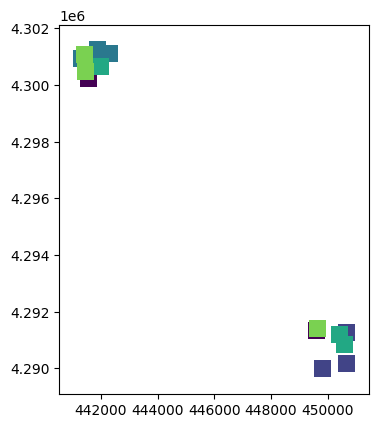

In [7]:
sampler = RandomGeoSampler(combined, size=1000, length=3)
run_epochs(combined, sampler)